## Encoding a Categorical Variable using Pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
dataset= pd.read_excel(r'C:/Users/Shambhavi/Downloads/datasets/stark_data.xlsx')

In [6]:
dataset.head()

,Character,Age,Gender,Survived
0,Eddard,52.0,Male,0
1,John,27.0,Male,1
2,Arya,21.0,Female,1
3,Bran,19.0,Male,1
4,Robb,NaN,Male,0


In [7]:
X_gender=dataset.iloc[:,2].values
X_gender

array(['Male', 'Male', 'Female', 'Male', 'Male', 'Female'], dtype=object)

In [8]:
#converting categorical features
X_dummy=pd.get_dummies(X_gender)
X_dummy

,Female,Male
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
5,1,0


In [9]:
X_dummy1=pd.get_dummies(X_gender,drop_first=True)
X_dummy1

,Male
0,1
1,1
2,0
3,1
4,1
5,0


## Encode a Categorical Variable using ML model


In [10]:
X=dataset.iloc[:,:-1].values
X

array([['Eddard', 52.0, 'Male'],
       ['John', 27.0, 'Male'],
       ['Arya', 21.0, 'Female'],
       ['Bran', 19.0, 'Male'],
       ['Robb', nan, 'Male'],
       ['Sansa', 24.0, 'Female']], dtype=object)

In [11]:
#impute the missimg values using sklearn imputer 

In [12]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer.fit(X[:,1:2])
X[:,1:2]=imputer.transform(X[:,1:2])
X[:,1:2]

array([[52.0],
       [27.0],
       [21.0],
       [19.0],
       [28.6],
       [24.0]], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X=LabelEncoder()
#column_gender encoding
X[:,2]=labelencoder_X.fit_transform(X[:,2])
X[:,2]

array([1, 1, 0, 1, 1, 0], dtype=object)

In [17]:
#column name encoding
X[:,0]=labelencoder_X.fit_transform(X[:,0])
X[:,0]

array([2, 3, 0, 1, 4, 5], dtype=object)

In [18]:
X

array([[2, 52.0, 1],
       [3, 27.0, 1],
       [0, 21.0, 0],
       [1, 19.0, 1],
       [4, 28.6, 1],
       [5, 24.0, 0]], dtype=object)

In [19]:
#one hot encoder creates a column for each value obtained
onehotencoder=OneHotEncoder(categorical_features=[0])
X=onehotencoder.fit_transform(X).toarray()
X

array([[ 0. ,  0. ,  1. ,  0. ,  0. ,  0. , 52. ,  1. ],
       [ 0. ,  0. ,  0. ,  1. ,  0. ,  0. , 27. ,  1. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ,  0. , 21. ,  0. ],
       [ 0. ,  1. ,  0. ,  0. ,  0. ,  0. , 19. ,  1. ],
       [ 0. ,  0. ,  0. ,  0. ,  1. ,  0. , 28.6,  1. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  1. , 24. ,  0. ]])

## Missing value Imputation with filna, dropna and interpolate

In [21]:
df=pd.read_csv(r'C:/Users/Shambhavi/Downloads/datasets/weather_data.csv')

In [22]:
df.head()

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain


In [23]:
import seaborn as sb

In [24]:
sb.heatmap(df.isnull())

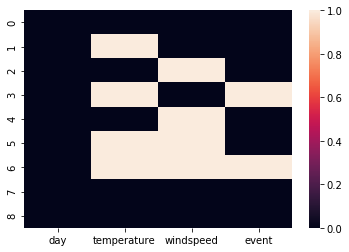

In [25]:
plt.show()

In [26]:
#fillna fills the missing values with desired values
new_df=df.fillna(0)

In [27]:
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,0.0,9.0,Sunny
2,1/5/2017,28.0,0.0,Snow
3,1/6/2017,0.0,7.0,0
4,1/7/2017,32.0,0.0,Rain
5,1/8/2017,0.0,0.0,Sunny
6,1/9/2017,0.0,0.0,0
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [28]:
new_df=df.fillna({
    'temperature':0,
    'windspeed':0,
    'event':'no event'
})

In [29]:
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,0.0,9.0,Sunny
2,1/5/2017,28.0,0.0,Snow
3,1/6/2017,0.0,7.0,no event
4,1/7/2017,32.0,0.0,Rain
5,1/8/2017,0.0,0.0,Sunny
6,1/9/2017,0.0,0.0,no event
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [31]:
#forward filling: takes previous value
new_df=df.fillna(method="ffill")
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,32.0,9.0,Sunny
2,1/5/2017,28.0,9.0,Snow
3,1/6/2017,28.0,7.0,Snow
4,1/7/2017,32.0,7.0,Rain
5,1/8/2017,32.0,7.0,Sunny
6,1/9/2017,32.0,7.0,Sunny
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [32]:
#backward filling: takes next value
new_df=df.fillna(method="bfill")
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,28.0,9.0,Sunny
2,1/5/2017,28.0,7.0,Snow
3,1/6/2017,32.0,7.0,Rain
4,1/7/2017,32.0,8.0,Rain
5,1/8/2017,34.0,8.0,Sunny
6,1/9/2017,34.0,8.0,Cloudy
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


## Linear Interpolation

In [34]:
#takes values average of previous and next value: polynomial distribution
#Linear interpolation is a method of curve fitting values using linear polynomial
#to construct new data points
#within the range of a discrete set of known data points
new_df=df.interpolate()
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.000000,6.00,Rain
1,1/4/2017,30.000000,9.00,Sunny
2,1/5/2017,28.000000,8.00,Snow
3,1/6/2017,30.000000,7.00,NaN
4,1/7/2017,32.000000,7.25,Rain
5,1/8/2017,32.666667,7.50,Sunny
6,1/9/2017,33.333333,7.75,NaN
7,1/10/2017,34.000000,8.00,Cloudy
8,1/11/2017,40.000000,12.00,Sunny


## DropNa

In [35]:
new_df=df.dropna()
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [36]:
# when the entire column is null then drop the column
new_df=df.dropna(how="all")
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [37]:
new_df=df.dropna(thresh=2)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


## Dropping Rows by Index Label

In [38]:
new_data=df.drop(1,axis=0)

In [39]:
new_data

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [43]:
new_data=df.drop(["windspeed"],axis=1)
new_data

,day,temperature,event
0,1/1/2017,32.0,Rain
1,1/4/2017,NaN,Sunny
2,1/5/2017,28.0,Snow
3,1/6/2017,NaN,NaN
4,1/7/2017,32.0,Rain
5,1/8/2017,NaN,Sunny
6,1/9/2017,NaN,NaN
7,1/10/2017,34.0,Cloudy
8,1/11/2017,40.0,Sunny


In [44]:
#permanently overwrite the dataset
df.drop(["windspeed"],axis=1,inplace=True)
df

,day,temperature,event
0,1/1/2017,32.0,Rain
1,1/4/2017,NaN,Sunny
2,1/5/2017,28.0,Snow
3,1/6/2017,NaN,NaN
4,1/7/2017,32.0,Rain
5,1/8/2017,NaN,Sunny
6,1/9/2017,NaN,NaN
7,1/10/2017,34.0,Cloudy
8,1/11/2017,40.0,Sunny
